In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams,cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [26]:
def strokeflow(w,p,dx,dy,l1_target):
    norm1=1
    norm2=1
    
    il = 0
    
    while norm1>l1_target or norm2>l1_target:
        pn=p.copy()
        wn=w.copy()
        #pn=numpy.empty_like(p)
        #wn=numpy.empty_like(w)

        w[1:-1,1:-1] = 0.25*(wn[1:-1,2:] + wn[1:-1, :-2]+ wn[2:, 1:-1] + wn[:-2, 1:-1])
        
        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2))*((pn[1:-1,2:]\
                                               +pn[1:-1,:-2])*dy**2 +(pn[2:,1:-1] + pn[:-2,1:-1])*dx**2\
                                              +wn[1:-1,1:-1]*dx**2*dy**2)
        ##Neumann boundary condition for psi
        #p[:,0]=p[:,1]
        #p[:,-1]=p[:,-2]
        #p[0,:]=p[1,:]
        #p[-1,:]=p[-2,:]+dy*u
    
            ##boundary condition for omega
        w[-1,:]=-0.5/dy**2*(8*p[-2,:]-p[-3,:])-3/dy
        w[0,:]=-0.5/dy**2*(8*p[1,:]-p[2,:])
        w[:,-1]=-0.5/dx**2*(8*p[:,-2]-p[:,-3])
        w[:,0]= -0.5/dx**2*(8*p[:,1]-p[:,2])
        norm1= L1norm(w, wn)
        norm2= L1norm(p, pn)
        
        il +=1
    return w, p
    

In [27]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)
u=1
x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)
w=numpy.zeros((nx,ny))
p=numpy.zeros((nx,ny))
l1_target = 1e-6

(omega, psi)=strokeflow(w,p,dx,dy,l1_target)
omega
psi

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.41429633e-06,   2.17360372e-06, ...,
          2.17360372e-06,   1.41429633e-06,   0.00000000e+00],
       [  0.00000000e+00,   2.20482440e-06,   1.45898838e-07, ...,
          1.45898838e-07,   2.20482440e-06,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -6.35061518e-03,  -1.52288240e-02, ...,
         -1.52288240e-02,  -6.35061518e-03,   0.00000000e+00],
       [  0.00000000e+00,  -7.32622358e-03,  -1.33638594e-02, ...,
         -1.33638594e-02,  -7.32622358e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

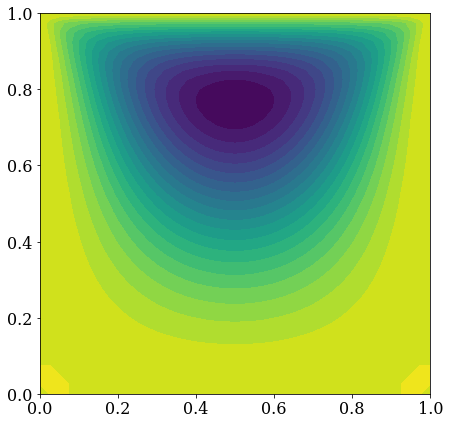

In [28]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psi,20, cmap=cm.viridis);

In [29]:
s=numpy.round(psi[32,::8], 4)

In [50]:
print("the first to the sixth number is:","%.4f"%s[0],s[1],s[2],s[3],s[4],s[5])

the first to the sixth number is: 0.0000 -0.0575 -0.0944 -0.0944 -0.0575 0.0


In [47]:
print("the max number in psi is:","%.4f"%numpy.amax(abs(psi)) )

the max number in psi is: 0.0998


In [52]:
print("the max number in omega is:","%.4f"%numpy.amax(abs(omega)))

the max number in omega is: 78.1927
